### Matplotlib 

#### Basics

matplotlib.pyplot is usually imported as plt. It is the core object that contains the methods to create all sorts of charts and features in a plot.

The %matplotlib inline is a jupyter notebook specific command that let’s you see the plots in the notbook itself.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

Let’s begin by making a simple but full-featured scatterplot and take it from there. Let’s see what plt.plot() creates if you an arbitrary sequence of numbers.

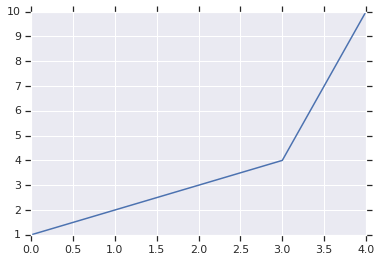

In [0]:
# Plot
plt.plot([1,2,3,4,10])

I just gave a list of numbers to plt.plot() and it drew a line chart automatically. The plt.plot accepts 3 basic arguments in the following order: (x, y, format).

Let’s draw a scaterplot with reddots.

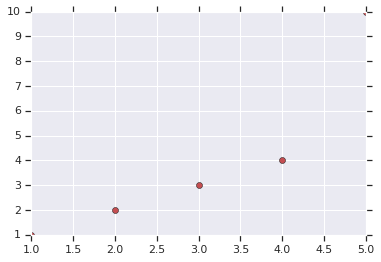

In [0]:
# 'ro' stands for red dots
plt.plot([1,2,3,4,5], [1,2,3,4,10], 'ro')
plt.show()

How to draw two sets of scatterplots in same plot?

Simply call plt.plot() again, it will add those point to the same picture.

You might wonder, why it does not draw these points in a new panel altogether? We will come to that in the next section.


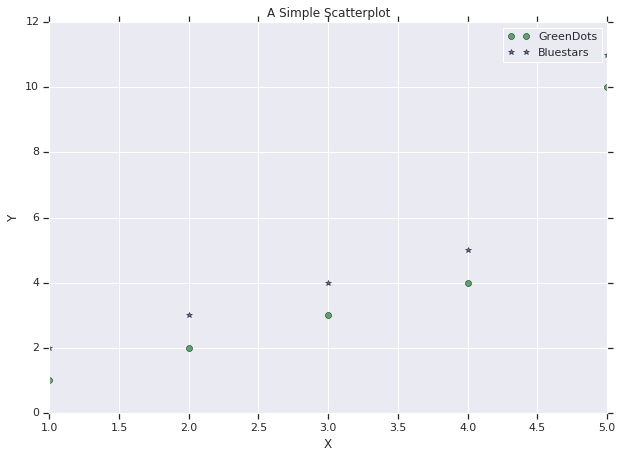

In [0]:
# Draw two sets of points
plt.figure(figsize=(10,7)) # 10 is width, 7 is height

plt.plot([1,2,3,4,5], [1,2,3,4,10], 'go', label='GreenDots')
plt.plot([1,2,3,4,5], [2,3,4,5,11], 'b*', label='Bluestars')

plt.title('A Simple Scatterplot')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend(loc='best')  # legend text comes from the plot's label parameter.

plt.show()


What does plt.figure do?

Well, every plot that matplotlib makes is drawn on something called 'figure'. You can think of the figure object as a canvas that holds all the subplots and other plot elements inside it. And a figure can have one or more subplots inside it called axes, arranged in rows and columns. Every figure has atleast one axes. (Don’t confuse this axes with X and Y axis, they are different.)

How to draw 2 scatterplots in different panels?

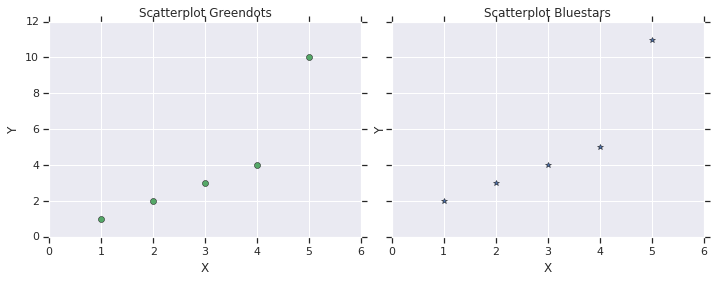

In [0]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot([1,2,3,4,5], [1,2,3,4,10], 'go')  # greendots
ax2.plot([1,2,3,4,5], [2,3,4,5,11], 'b*')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title('Scatterplot Greendots'); ax2.set_title('Scatterplot Bluestars')
ax1.set_xlabel('X');  ax2.set_xlabel('X')  # x label
ax1.set_ylabel('Y');  ax2.set_ylabel('Y')  # y label
ax1.set_xlim(0, 6) ;  ax2.set_xlim(0, 6)   # x axis limits
ax1.set_ylim(0, 12);  ax2.set_ylim(0, 12)  # y axis limits

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

# ax1.set(title='Scatterplot Greendots', xlabel='X', ylabel='Y', xlim=(0,6), ylim=(0,12))
# ax2.set(title='Scatterplot Bluestars', xlabel='X', ylabel='Y', xlim=(0,6), ylim=(0,12))

#### Object Oriented Syntax vs Matlab like Syntax

Matplotlib is has two coding interfaces:
- Matlab like syntax
- Object oriented syntax.

The syntax you’ve seen so far is the Object-oriented syntax. 

The matlab syntax is ‘stateful’. That means, the plt keeps track of what the current axes is. So whatever you draw with plt.{anything} will reflect only on the current subplot.

Always remember: plt.plot() or plt.{anything} will always act on the plot in the current axes, whereas, ax.{anything} will modify the plot inside that specific ax.


Recreating the above multi-subplots figure using matlab-like syntax.

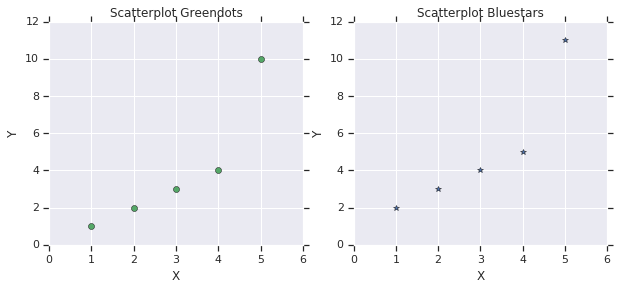

In [0]:
plt.figure(figsize=(10,4), dpi=120) # 10 is width, 4 is height

# Left hand side plot
plt.subplot(1,2,1)  # (nRows, nColumns, axes number to plot)
plt.plot([1,2,3,4,5], [1,2,3,4,10], 'go')  # green dots
plt.title('Scatterplot Greendots')  
plt.xlabel('X'); plt.ylabel('Y')
plt.xlim(0, 6); plt.ylim(0, 12)

# Right hand side plot
plt.subplot(1,2,2)
plt.plot([1,2,3,4,5], [2,3,4,5,11], 'b*')  # blue stars
plt.title('Scatterplot Bluestars')  
plt.xlabel('X'); plt.ylabel('Y')
plt.xlim(0, 6); plt.ylim(0, 12)
plt.show()

#### Common charts 

/export/hda3/borglet/remote_hdd_fs_dirs/0.colab_kernel_aroramansi.kernel.aroramansi.121503416429.14b334fb3717c109/mount/server/notebook.par/google3/third_party/py/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()


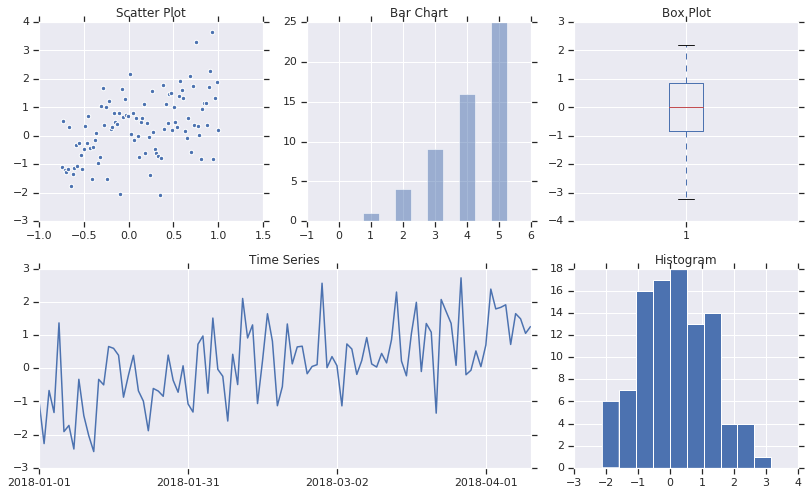

In [0]:

# Setup the subplot2grid Layout
fig = plt.figure(figsize=(15, 7))
ax1 = plt.subplot2grid((2,4), (0,0)) 
ax2 = plt.subplot2grid((2,4), (0,1)) 
ax3 = plt.subplot2grid((2,4), (0,2)) 
ax4 = plt.subplot2grid((2,4), (1,0), colspan=2) 
ax5 = plt.subplot2grid((2,4), (1,2)) 

# Input Arrays
n = np.array([0,1,2,3,4,5])
x = np.linspace(0,5,10) # 10 values from 0 to 5
xx = np.linspace(-0.75, 1., 100)

# Scatterplot
ax1.scatter(xx, xx + np.random.randn(len(xx)))
ax1.set_title("Scatter Plot")

# Bar Chart
ax2.bar(n, n**2, align="center", width=0.5, alpha=0.5)
ax2.set_title("Bar Chart")

# Box Plot
ax3.boxplot(np.random.randn(len(xx)))
ax3.set_title("Box Plot")

# Time Series
dates = pd.date_range('2018-01-01', periods = len(xx))
ax4.plot(dates, xx + np.random.randn(len(xx)))
ax4.set_xticks(dates[::30])
ax4.set_xticklabels(dates.strftime('%Y-%m-%d')[::30])
ax4.set_title("Time Series")


# Histogram
ax5.hist(xx + np.random.randn(len(xx)))
ax5.set_title("Histogram")

fig.tight_layout()

### Seaborn

Seaborn provides a high-level interface to Matplotlib, a powerful but sometimes unwieldy Python visualization library.

On Seaborn’s official website, they state: ***If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.***

In practice, the “well-defined set of hard things” includes:

- Using default themes that are aesthetically pleasing.
- Setting custom color palettes.
- Making attractive statistical plots.
- Easily and flexibly displaying distributions.
- Visualizing information from matrices and DataFrames.

However, Seaborn is a complement, not a substitute, for Matplotlib. There are some tweaks that still require Matplotlib, and we’ll cover how to do that as well.



In [0]:
import seaborn as sns

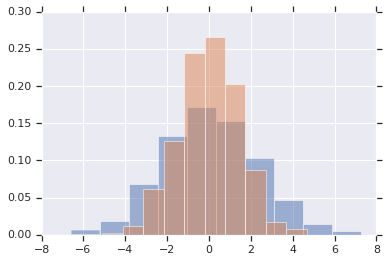

In [0]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

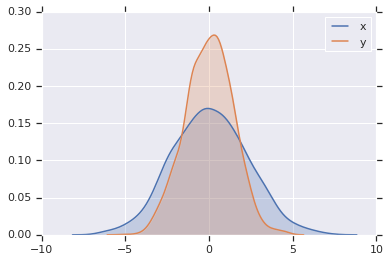

In [0]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

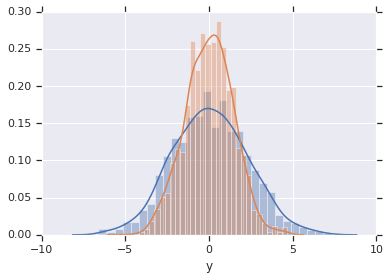

In [0]:
sns.distplot(data['x'])
sns.distplot(data['y']);

In [0]:
from vega_datasets import data
iris = data.iris()
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


/export/hda3/borglet/remote_hdd_fs_dirs/0.colab_kernel_aroramansi.kernel.aroramansi.121503416429.14b334fb3717c109/mount/server/notebook.par/google3/third_party/py/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.


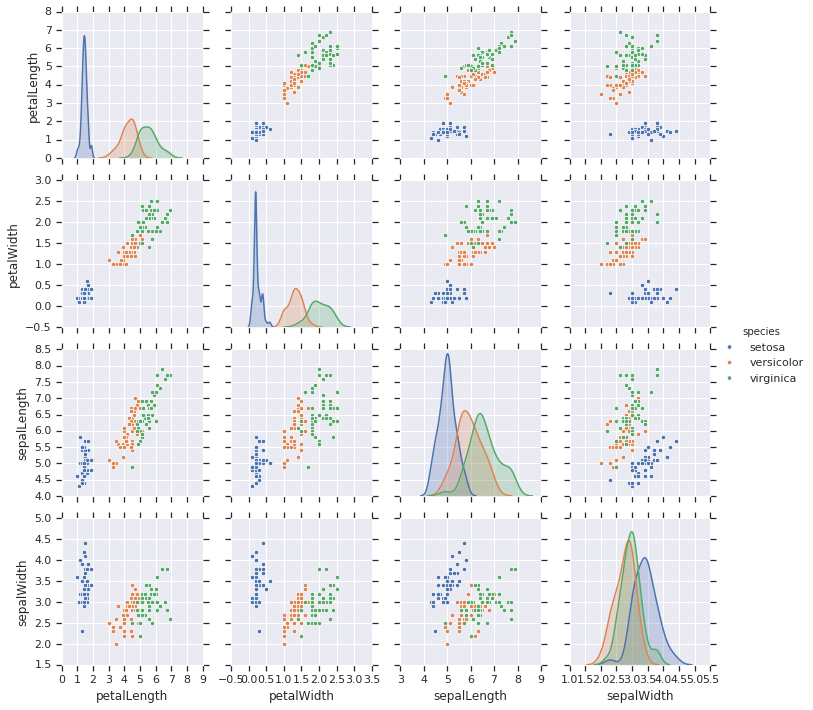

In [0]:
sns.pairplot(iris, hue='species', size=2.5)